<a href="https://colab.research.google.com/github/Jason2001167/CECS_456/blob/main/Copy_of_CECS_456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attribuite Info:::

In [2]:
"""
## This section contains a brief description for each attribute.
## Details on attribute coding can be obtained from the accompanying R code for reading the data
## or the accompanying code table,
## as well as from Groemping (2019) (listed under 'Relevant Papers').

Column name: laufkont
Variable name: status
Content: status of the debtor's checking account with the bank (categorical)

Column name: laufzeit
Variable name: duration
Content: credit duration in months (quantitative)

Column name: moral
Variable name: credit_history
Content: history of compliance with previous or concurrent credit contracts (categorical)

Column name: verw
Variable name: purpose
Content: purpose for which the credit is needed (categorical)

Column name: hoehe
Variable name: amount
Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

Column name: sparkont
Variable name: savings
Content: debtor's savings (categorical)

Column name: beszeit
Variable name: employment_duration
Content: duration of debtor's employment with current employer (ordinal; discretized quantitative)

Column name: rate
Variable name: installment_rate
Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)

Column name: famges
Variable name: personal_status_sex
Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories

Column name: buerge
Variable name: other_debtors
Content: Is there another debtor or a guarantor for the credit? (categorical)

Column name: wohnzeit
Variable name: present_residence
Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)

Column name: verm
Variable name: property
Content: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal)

Column name: alter
Variable name: age
Content: age in years (quantitative)

Column name: weitkred
Variable name: other_installment_plans
Content: installment plans from providers other than the credit-giving bank (categorical)

Column name: wohn
Variable name: housing
Content: type of housing the debtor lives in (categorical)

Column name: bishkred
Variable name: number_credits
Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.

Column name: beruf
Variable name: job
Content: quality of debtor's job (ordinal)

Column name: pers
Variable name: people_liable
Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative)

Column name: telef
Variable name: telephone
Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)

Column name: gastarb
Variable name: foreign_worker
Content: Is the debtor a foreign worker? (binary)

Column name: kredit
Variable name: credit_risk
Content: Has the credit contract been complied with (0) or not (1)  (binary)

link to paper that describes in greater detail categorical attribuites
FROM http://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf

"""

"\n## This section contains a brief description for each attribute.\n## Details on attribute coding can be obtained from the accompanying R code for reading the data\n## or the accompanying code table,\n## as well as from Groemping (2019) (listed under 'Relevant Papers').\n\nColumn name: laufkont\nVariable name: status\nContent: status of the debtor's checking account with the bank (categorical)\n\nColumn name: laufzeit\nVariable name: duration\nContent: credit duration in months (quantitative)\n\nColumn name: moral\nVariable name: credit_history\nContent: history of compliance with previous or concurrent credit contracts (categorical)\n\nColumn name: verw\nVariable name: purpose\nContent: purpose for which the credit is needed (categorical)\n\nColumn name: hoehe\nVariable name: amount\nContent: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of\ntransformation unknown)\n\nColumn name: sparkont\nVariable name: savings\nContent: debtor's savin

Importing the packages

In [3]:
!pip install Cython
!pip install hdbscan
!pip install kneed # To install only knee-detection algorithm
import hdbscan
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans # for KMeans algorithm
from kneed import KneeLocator # To find elbow point
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541560 sha256=a771240caac412dbf2c4979afd0b2f3365a4073a52e158e77ab308568dc93ff6
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading/Gathering data from CSV file

In [4]:
data = pd.read_csv("SouthGermanCredit.csv")

Identifty and Drop Outliers correlating to age, duration, and credit amount

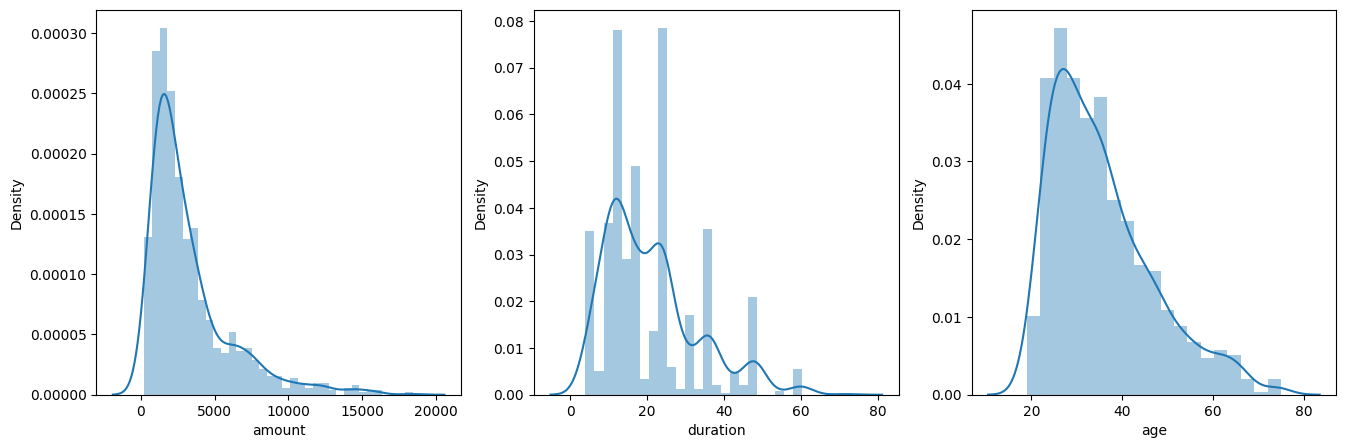

Old Shape:  (1000, 21)
New Shape:  (900, 21)


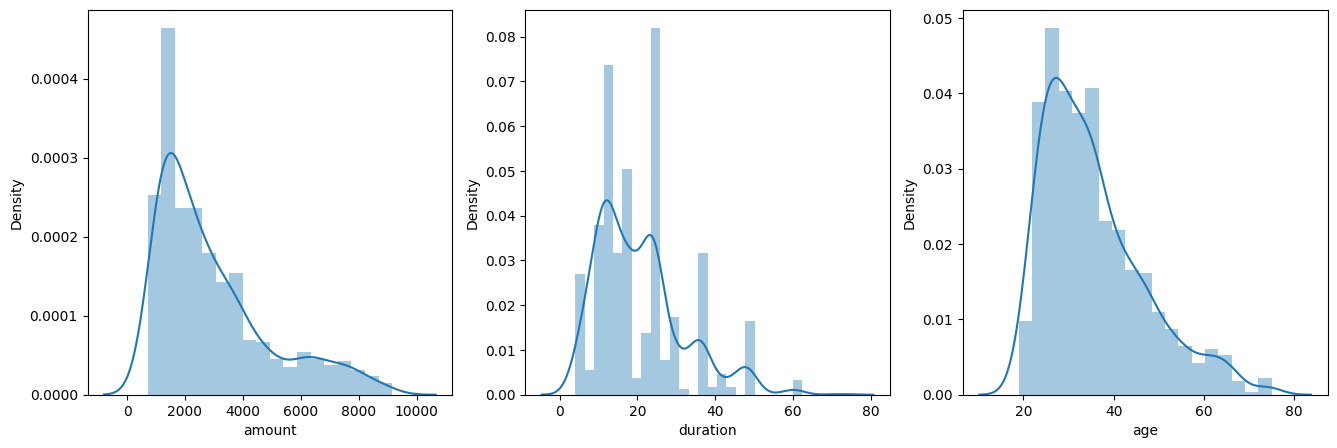

In [5]:
import plotly.express as px
import warnings

# These featrues are chosen due to being qualitive features of the CSV file
# Outliers sorted based on amount 
# Can compare other features to these qualtiive features such as credit amount vs risk etc...... 

warnings.filterwarnings('ignore')
# generating statistics of data
data.describe()[['age','amount','duration']]
# Plot distribution plot for features

data.sample(5)

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data['amount'])
plt.subplot(1,3,2)
sns.distplot(data['duration'])
plt.subplot(1,3,3)
sns.distplot(data['age'])
plt.show()

# Due to all features having a skewed disbruition, z-score treatment is not ideal
# IQR is a better approach

print("Old Shape: ", data.shape)

q_low = data["amount"].quantile(0.05)
q_hi  = data["amount"].quantile(0.95)

data_filtered = data[(data['amount'] < q_hi) & (data['amount'] > q_low)]


print("New Shape: ", data_filtered.shape)

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data_filtered['amount'])
plt.subplot(1,3,2)
sns.distplot(data_filtered['duration'])
plt.subplot(1,3,3)
sns.distplot(data_filtered['age'])
plt.show()

# Drops around 100 rows of data
# Maybe only drop top 5% of data due to bottom 5% being prominent to data and patterns

Creation of correlation matrix and heatmap

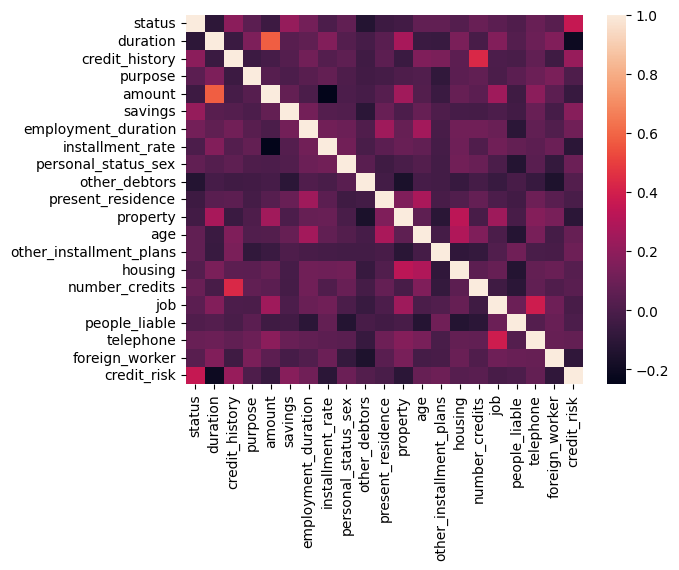

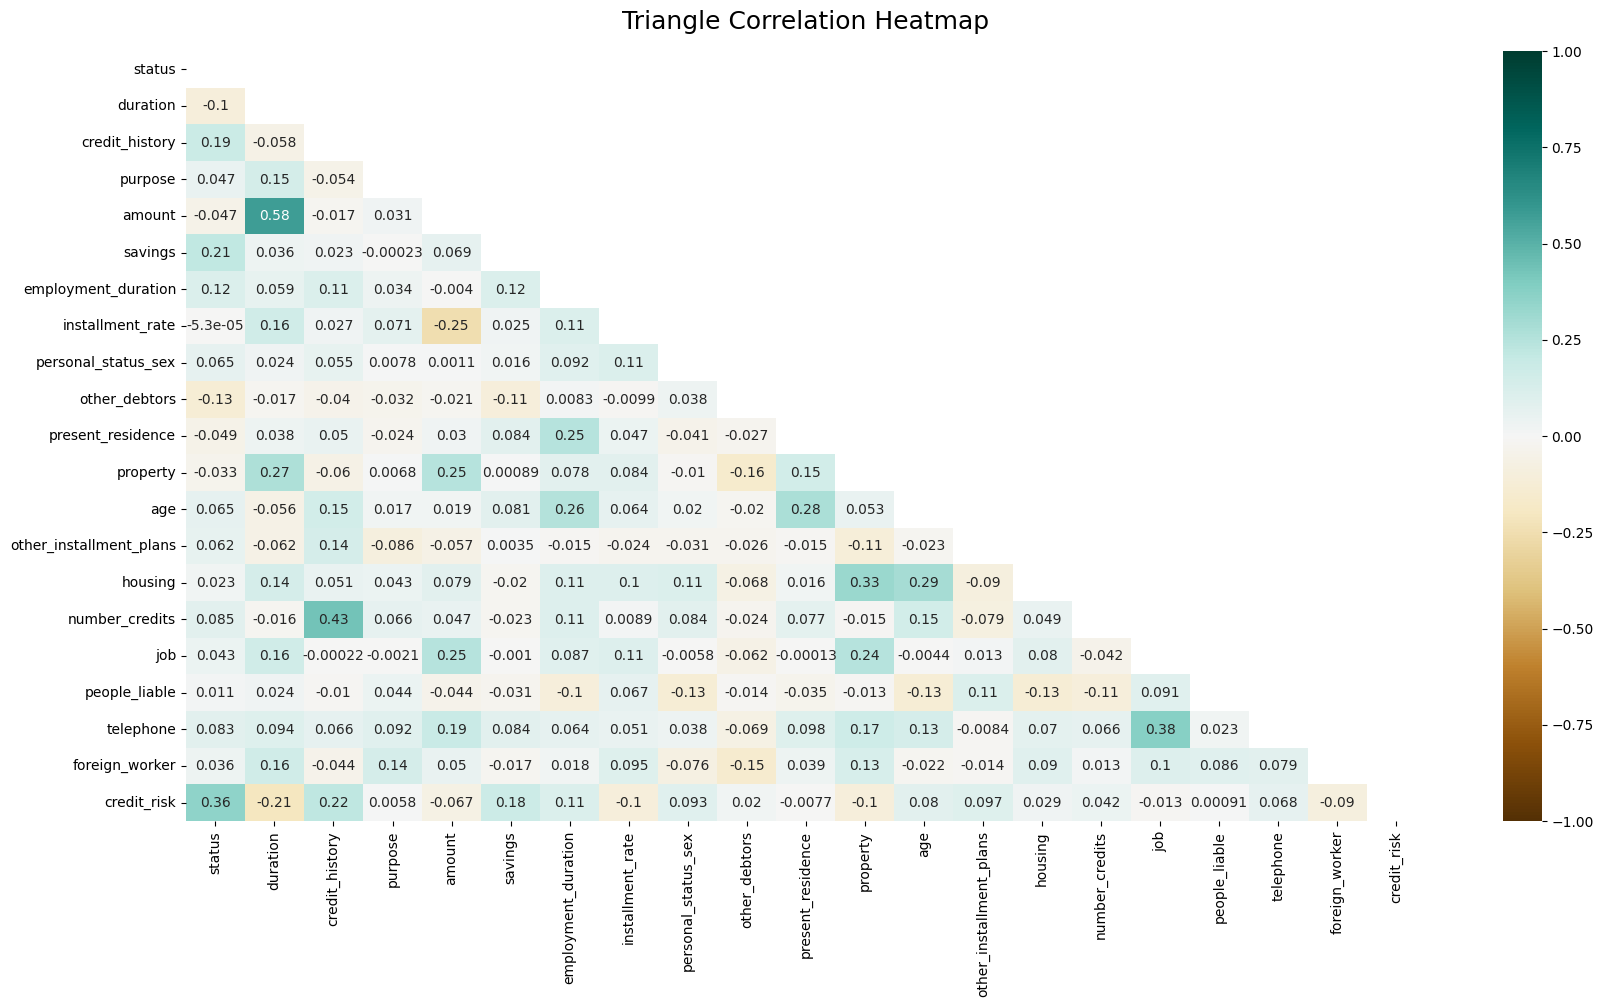

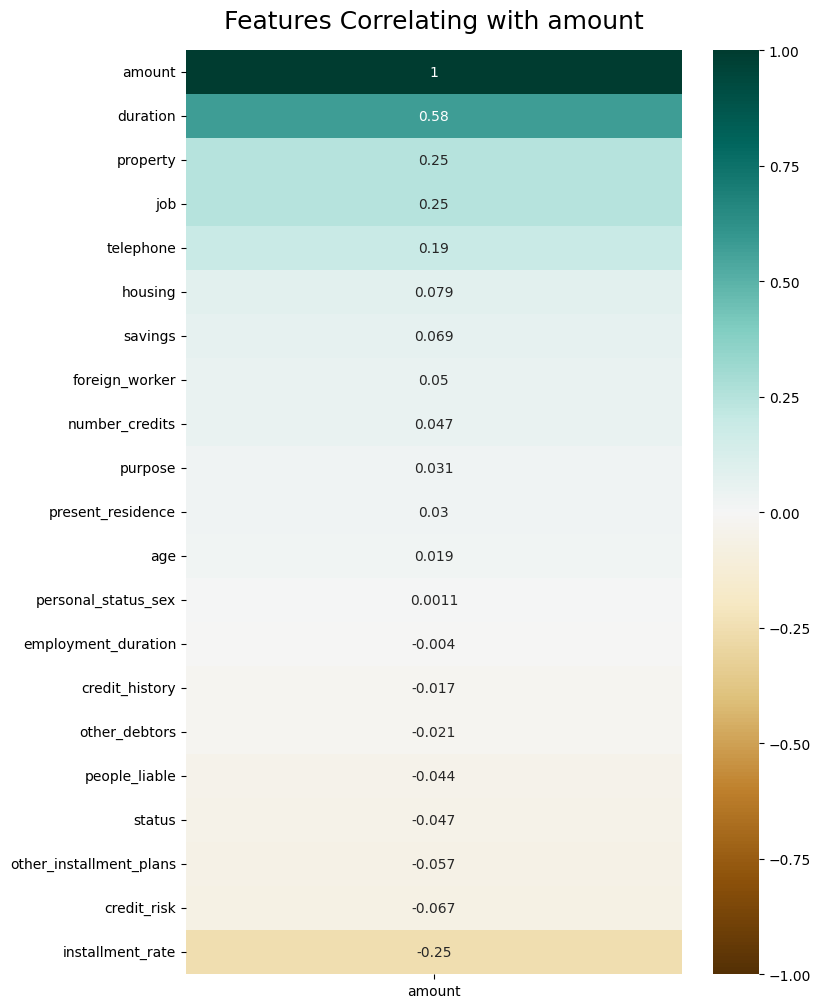

In [6]:
data_filtered.corr()

sns.heatmap(data_filtered.corr());

plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_filtered.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_filtered.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);



plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_filtered.corr()[['amount']].sort_values(by='amount', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with amount', fontdict={'fontsize':18}, pad=16);

Correlation matrix (cleaner than first sample)

<Axes: >

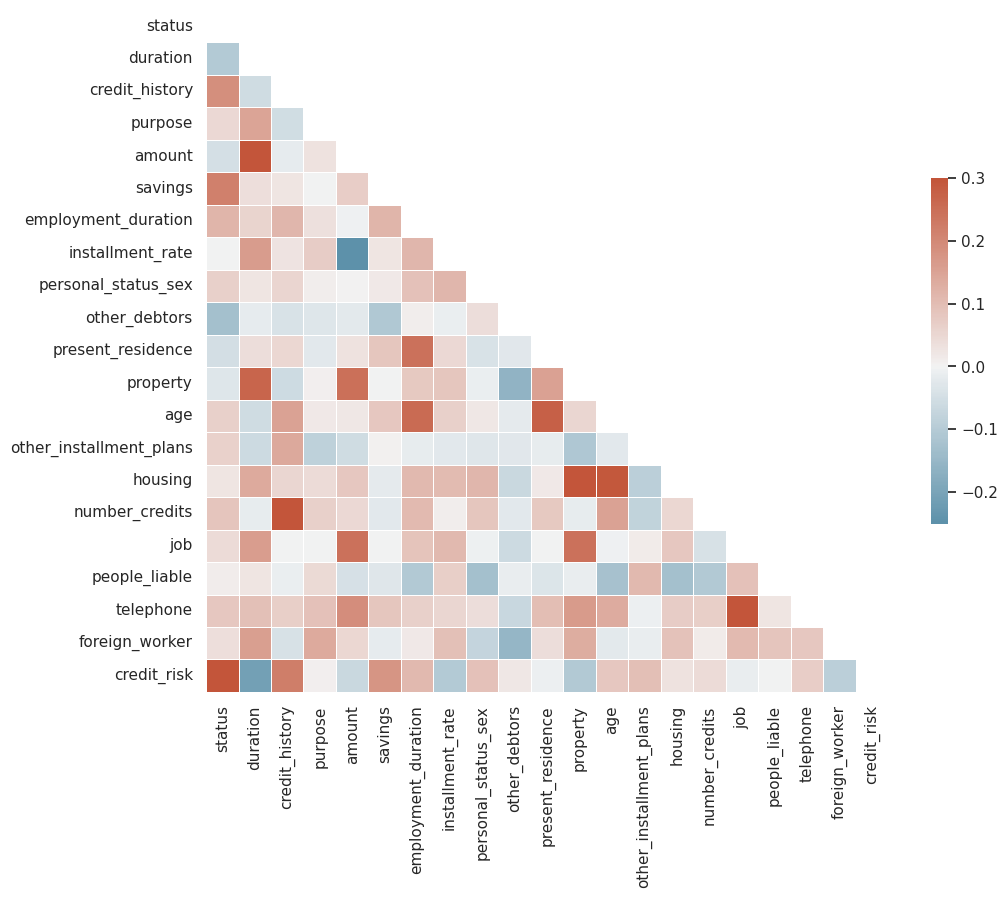

In [7]:
# Create matrix

sns.set_theme(style="white")

data_filtered.corr()

corr = data_filtered.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Possbily plot via seaborn?

Plot graphical distribuition


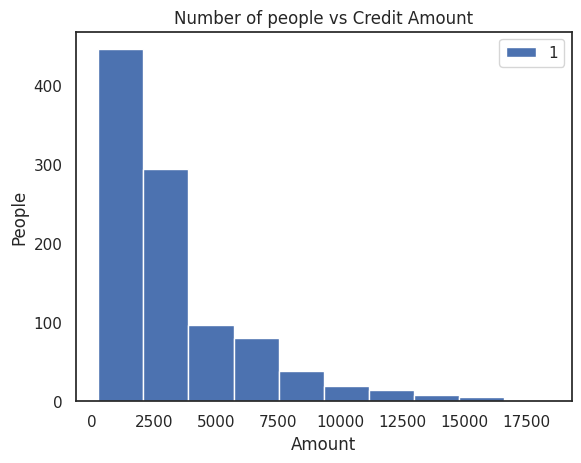

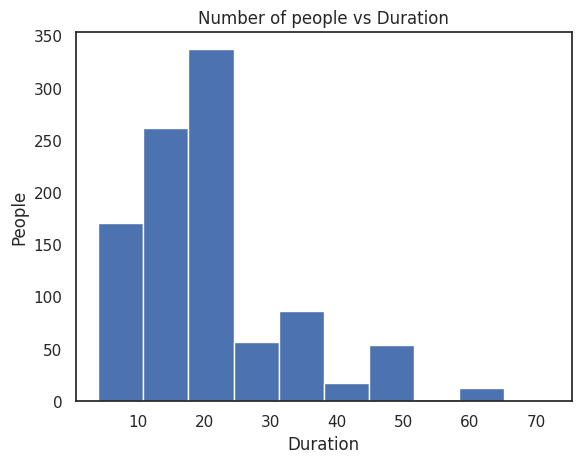

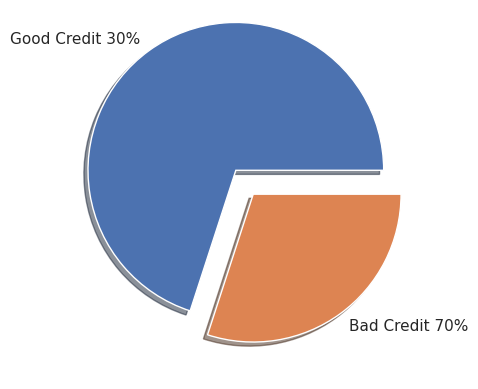

In [8]:
# basically plotting different repersentions of the data 
# Can use to repersent patterns in data for presentation

# Histogram of the credit amount
plt.hist(data["amount"],bins=10)
plt.xlabel("Amount")
plt.ylabel("People")
plt.title("Number of people vs Credit Amount")
plt.legend("1 GDM = ")
plt.show()

# Histogram of Duration
plt.hist(data["duration"],bins=10)
plt.xlabel("Duration")
plt.ylabel("People")
plt.title("Number of people vs Duration")
plt.show()

y = np.array([700,300])
mylabels = ["Good Credit 30%", "Bad Credit 70%"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

# New Section

Calculate the sum of squared distances of each K

> Indented block



In [9]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered[['age','amount']])
  sse.append(kmeans.inertia_)

ELBOW METHOD

We are using the elbow method because our dataset is relatively compact and well-seperated. Since each row in the dataset represents a customer and the columns represent different features, we can safely cluster the customers based on their demographics. It is also reasonable that we can easily divide the customers into distinct, non-overlapping segments based on their individual demographics. This will allow us to find trends in our data and potentially identify correlations between the demographics of the customers and credit.

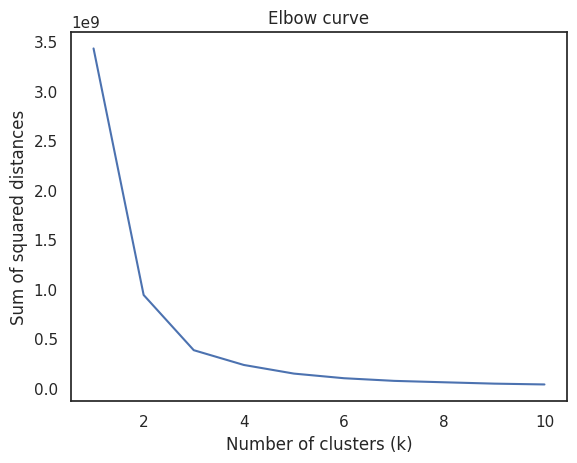

In [10]:
plt.plot(range(1,11),sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow curve')
plt.show()

Identifying elbow point of curve

In [11]:
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(k1.elbow)


3


K - Means Clustering for Age Vs. credit amt


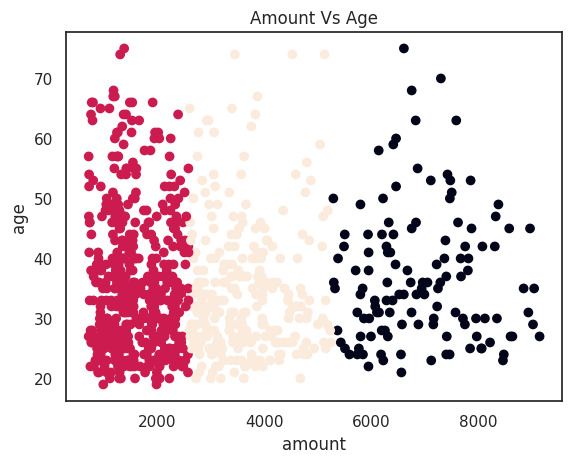

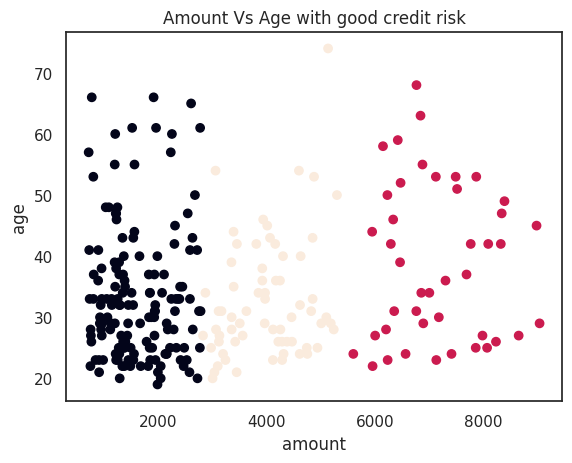

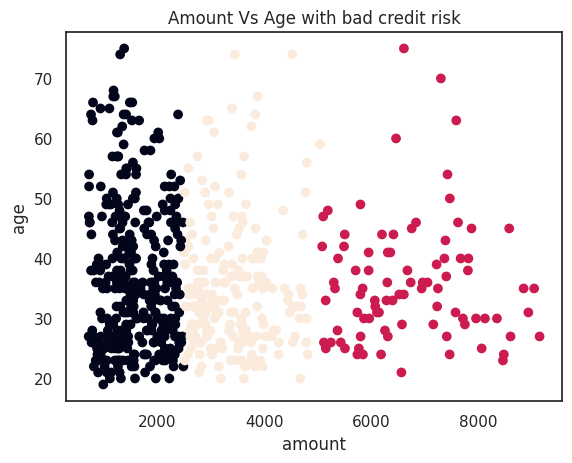

In [12]:
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data_filtered[['age','amount']]))

plt.xlabel('amount')
plt.ylabel('age')
plt.title('Amount Vs Age')

plt.scatter(data_filtered['amount'], data_filtered['age'], c=kmeans.labels_)
plt.show()

# filters data to only those with good credit risk
data_filtered2 = data_filtered[(data['credit_risk'] == 0)]
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered2[['amount','age']])
  sse.append(kmeans.inertia_)
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data_filtered2[['amount','age']]))

plt.xlabel('amount')
plt.ylabel('age')
plt.title('Amount Vs Age with good credit risk')

plt.scatter(data_filtered2['amount'], data_filtered2['age'], c=kmeans.labels_)
plt.show()

# filters data to only those with bad credit risk
data_filtered3 = data_filtered[(data['credit_risk'] == 1)]
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered3[['amount','age']])
  sse.append(kmeans.inertia_)
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data_filtered3[['amount','age']]))

plt.xlabel('amount')
plt.ylabel('age')
plt.title('Amount Vs Age with bad credit risk')

plt.scatter(data_filtered3['amount'], data_filtered3['age'], c=kmeans.labels_)
plt.show()

Interpretation of K Means Clustering of Age vs Credit Amt: Correlation: Based on the three clusters created the graph describes a couple patterns. The clusters are divided into three clusters that represent low, moderate, and high credit amounts. Most people in the dataset fall under approximately 3,000 for their credit amount with a high concentration of 20 - 30 year old people being present. As the credit amount or age increases, less credit holders begin to appear. Upon filtering based on good or bad credit risks according to the company’s metrics, a pattern doesn’t emerge as the graphs are pretty evenly spread meaning age and credit amount aren’t the prominent factors in being selected as a good or bad credit risk.



Amount Vs. Duration

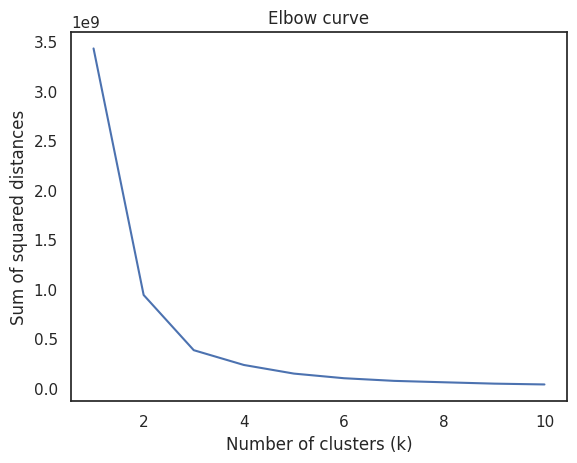

3


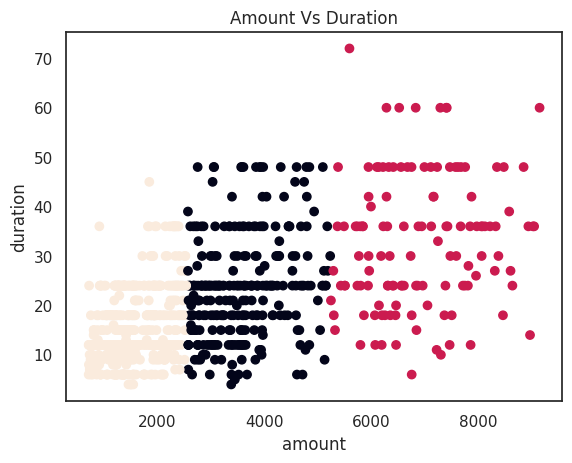

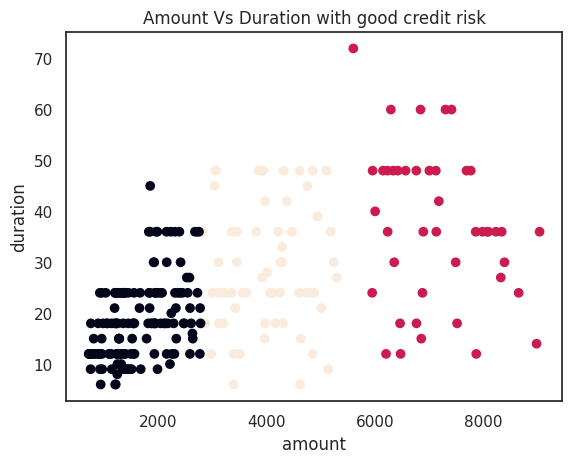

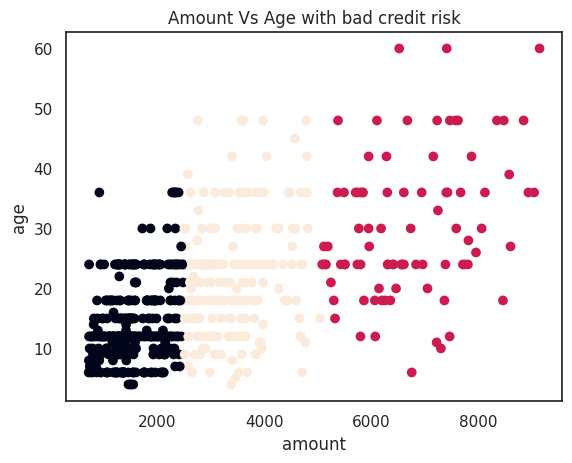

In [13]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered[['amount','duration']])
  sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow curve')
plt.show()

k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(k1.elbow)

k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data_filtered[['amount','duration']]))

plt.scatter(data_filtered['amount'], data_filtered['duration'], c=kmeans.labels_)

plt.xlabel('amount')
plt.ylabel('duration')
plt.title('Amount Vs Duration')

plt.show()

# filters data to only those with good credit risk
data_filtered2 = data_filtered[(data['credit_risk'] == 0)]
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered2[['amount','duration']])
  sse.append(kmeans.inertia_)
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data_filtered2[['amount','duration']]))

plt.xlabel('amount')
plt.ylabel('duration')
plt.title('Amount Vs Duration with good credit risk')

plt.scatter(data_filtered2['amount'], data_filtered2['duration'], c=kmeans.labels_)
plt.show()

# filters data to only those with bad credit risk
data_filtered3 = data_filtered[(data['credit_risk'] == 1)]
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered3[['amount','duration']])
  sse.append(kmeans.inertia_)
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit((data_filtered3[['amount','duration']]))

plt.xlabel('amount')
plt.ylabel('age')
plt.title('Amount Vs Age with bad credit risk')

plt.scatter(data_filtered3['amount'], data_filtered3['duration'], c=kmeans.labels_)
plt.show()


Age Vs. Duration

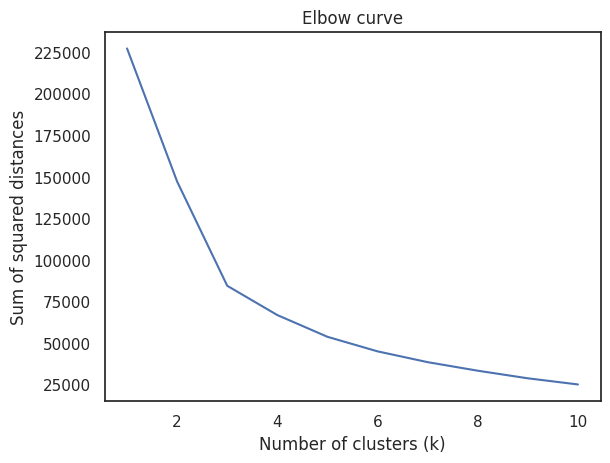

3


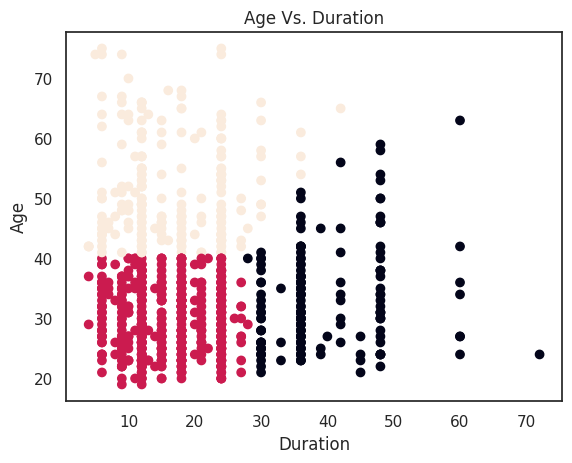

In [14]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
  kmeans.fit(data_filtered[['duration','age']])
  sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow curve')
plt.show()

k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(k1.elbow)

k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kmeans = KMeans(n_clusters=3)
kmeans.fit((data_filtered[['duration','age']]))

plt.scatter(data_filtered['duration'], data_filtered['age'], c=kmeans.labels_)

plt.xlabel('Duration')
plt.ylabel('Age')
plt.title('Age Vs. Duration')


plt.show()

PERFORMANCE METRIC: SILHOUETTE SCORE WE GET A SCORE OF 0.0271.

This metric measures how well each data point fits into its assigned cluster, based on both the distance to the points in its own cluster and the distance to points in the nearest neighboring cluster. The Silhouette Score ranges from -1 to 1, with higher scores indicating better-defined clusters. A score of 0 indicates overlapping clusters.

In [16]:
silhouette = silhouette_score(data_filtered,kmeans.labels,metric='euclidean')
print(silhouette)

0.027129119368430037


--------------------------------------------------------------------------------HDBSCAN--------------------------------------------------------

If code below says hdbscan package not found run following commands.

Based on the graphs shown:
Interpretation of K Means Clustering of Age vs Credit Amt: Correlation: As the age of the customers increases the amount of credit decreases. The age group with the highest amount of credit is from the ages of 20-50.


In [ ]:
!pip install Cython

!pip install hdbscan

Code below basically helps get started by getting all the data together

In [ ]:

import hdbscan
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE





data = pd.read_csv("SouthGermanCredit.csv")

projection = TSNE().fit_transform(data)
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, alpha = 5.0)

clusterer.fit(data)


Next set of code basically takes the data we current have from the South German Credit and puts it into a T-SNE graph. T-SNE helps us to visualize high-dimensional datasets (need to read up on specifics later on how it works) Currently coded such that each cluster created by HDBSCAN() will be displayed as a different color to neighboring clusters (there are repeating colors but if they aren't next to each other they are different clusters)

In [ ]:
color_palette = sns.color_palette('Paired', 28)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

Below is an array which basically shows which cluster each row in the dataset is contained within. Clusters are numbered from 0 - cluster.labels_.max(). If the number reads -1 then the data is considered noise and isn't a part of any of the clusters. cluster.labels_.max() when we don't add any parameters to HDBSCAN is 26 meaning there are 27 clusters.

In [ ]:
clusterer.labels_

In [ ]:
clusterer.labels_.max()

plots cluster given by HDBSCAN into a dendrogram in two different ways. First dendro gram is a single linkage tree. second is a condensed tree. TL;DR from what I understand so far is the more distance between any two clusters the less similarities there are between the two clusters. (for the second graph I set it up such that every red line you see is a cluster taken from HDBSCAN to make it slightly easier to read still don't fully understand it myself though)

In [ ]:
clusterer.single_linkage_tree_.plot()

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))